# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju Korogi Oliveira e Gabriel Limas Nunes
### **Matrículas:**  2021032110 e 2021032048


### **Tema:** Aluguel de Apartamentos no EUA
### **Base de dados:** https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified


**Todas as células que não possuem comentários que indiquem ter sido criadas manualmente ou alteradas, foram geradas através de iterações com o ChatGPT, com mudanças muito pequenas como nomes de variáveis.**

## **ChatGPT Links**

**Data Understanding:** https://chat.openai.com/share/ac22af3f-b32c-4961-9928-5007332790be

**Data Preparation:** https://chat.openai.com/share/f2df0f78-4a36-4485-a269-0444fff74782

**Modeling:** https://chat.openai.com/share/74627a72-3d7e-4604-b567-21f77c755fc3 and https://chat.openai.com/share/29f3cf3c-d664-4131-964e-1fc5914623cb

**Evaluation:** https://chat.openai.com/share/b156da57-209e-4e05-a3b0-8fd4b5d9d667


## Imports

In [1]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score,  calinski_harabasz_score
from sklearn.decomposition import PCA
import warnings
import gmplot

In [2]:
warnings.simplefilter(action='ignore')

# **Introdução**

Neste trabalho, analisamos um banco de dados de apartamentos disponíveis para aluguel nos Estados Unidos, buscando entender as tendências de mercado e os principais fatores colaborantes para a decisão do preço final de aluguel do imóvel.


O banco de dados é formado por 100000 apartamentos disponíveis para aluguel nos EUA, possuindo o preço do aluguel e diversos atributos do apartamento como localização, número de quartos, número de banheiros, entre outros.


O ChatGPT foi escolhido como ferramenta para auxiliar na análise dos dados, permitindo a criação de códigos e aplicação de algoritmos com maior facilidade, além de nos permitir analisar o desempenho da ferramenta automatizada nas diferentes etapas de CRISP.

# **Motivação**

A principal motivação desse projeto é o melhor entendimento das características que afetam o preço de aluguel de um apartamento, permitindo possivelmente a criação de ferramentas que auxilie na busca por apartamentos ao possibilitar a pesquisa em uma faixa de preço específico definindo atributos desejados no imóvel, além de auxiliar proprietários a estimar um valor adequado para um apartamento com base em suas características.

# **Objetivo**

## **Geral**


O objetivo deste trabalho é clusterizar apartamentos com base nos seus atributos e utilizar esses clusters para realizar uma análise de
mercado, identificando quais atributos são mais relevantes para o preço do aluguel, além de reconhecer quais atributos estão mais fortemente
relacionados.

## **Específicos**

- Analisar a histogramas de algumas colunas da base de dados
- Avaliar os outliers das colunas
- Selecionar as colunas importantes para a clusterização
- Retirar outliers
- Aplicar algoritmos de clusterização
- Avaliar a qualidade da clusterização por meio de métricas como silhueta e Davies-Bouldin index


# **Metodologia**

Realizar a clusterização de um dataset envolve múltiplos passos, anteriores a criação dos clusters. 


Primeiramente, é necessário adquirir o dataset apropriado para esse projeto e entender quais são os dados presentes nele e o que representam. 


Em seguida, precisamos realizar um pré-processamento dos dados, em que o dataset é limpo e normalizado, com o objetivo de evitar erros e bias, e é preparado para a aplicação de algoritmos de aprendizado de máquina não supervisionados.


Uma vez que o processo de limpeza e normalização foi realizado, podemos começar o processo de criação de cluster utilizando diferentes métodos como k-means, clusterização hierarquica etc. Com os clusters criados podemos identificar as matrizes dos diferentes clusters.


Para identificar o número de clusters apropriado para nossa análise utilizamos a técnica de Within Sum of Squares(WSS), garantindo que temos um número ótimo de clusters antes de seguirmos para a criação de um modelo.

Possuindo o dataset clusterizado, é possível entender os comportamentos e traços dos diferentes clusters com base no padrão de compra, comportamento e outros atributos.



# **Desenvolvimento**


## **2. Data understanding (Entendimento dos dados)**


### Informações Básicas

A base de dados trata dos atributos de apartamentos para alugar ao redor dos Estados Unidos.

In [3]:
#Carregando a base de dados
df = pd.read_csv('./10k.csv', delimiter=';', encoding='utf-8')

In [4]:
df.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


Os atributos dessa base são:
- id = identificador único do apartamento
- category = categoria do classificado
- title = texto do título do apartamento
- body = texto do corpo do apartamento
- amenities = comodidades, como ar- condicionado, quadra de basquete, TV a cabo, academia, acesso à internet, piscina, geladeira, etc.
- bathrooms = número de banheiros
- bedrooms = número de quartos
- currency = preço na moeda atual
- fee = taxa
- has_photo = foto do apartamento
- pets_allowed = animais de estimação permitidos, como cães/gatos, etc.
- price = preço do aluguel do apartamento
- price_display = preço convertido para exibição ao leitor
- price_type = preço em dólares americanos
- square_feet = tamanho do apartamento em pés quadrados
- address = onde o apartamento está localizado
- cityname = cidade onde o apartamento está localizado
- state = estado onde o apartamento está localizado
- latitude = latitude onde o apartamento está localizado
- longitude = longitude onde o apartamento está localizado
- source = origem do classificado
- time = quando o classificado foi criado

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [6]:
print(df.describe())

                 id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.568781e+09  
50%      38.809800

### Gráficos para melhor entendimento dos atributos

Em geral, não há uma correlação muito significativa entre nenhum atributo. Algumas exceções são a correlação alta entre a quantidade de banheiros e a quantidade de quartos e entre a quantidade de banheiros e o metro quadrado. Um motivo que pode explicar a primeira situação é que residências que abrigam muitas pessoas, ou seja, que tem muitos quartos, também devem ter mais banheiros para atender os moradores. Além disso, para explicar a segunda correlação alta, quanto mais banheiros, mais ocupa-se espaço.

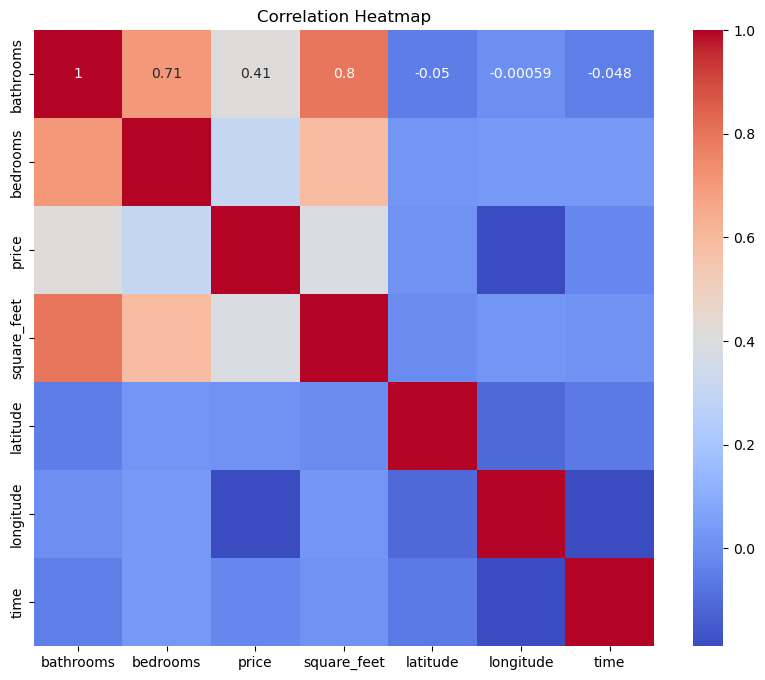

In [7]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Create a correlation heatmap for numerical columns
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Por meio do histograma e do boxplot para preço do aluguel, observa-se que há muitos outliers para essa feature. Em especial, há muitos apartamentos com um preço muito alto.

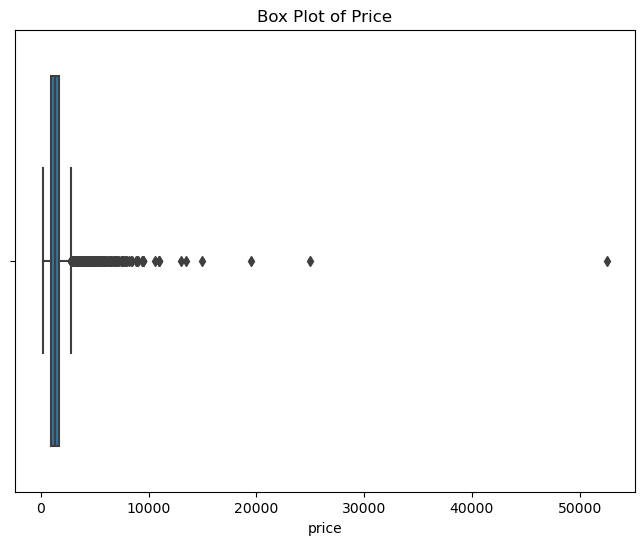

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Price')
plt.show()

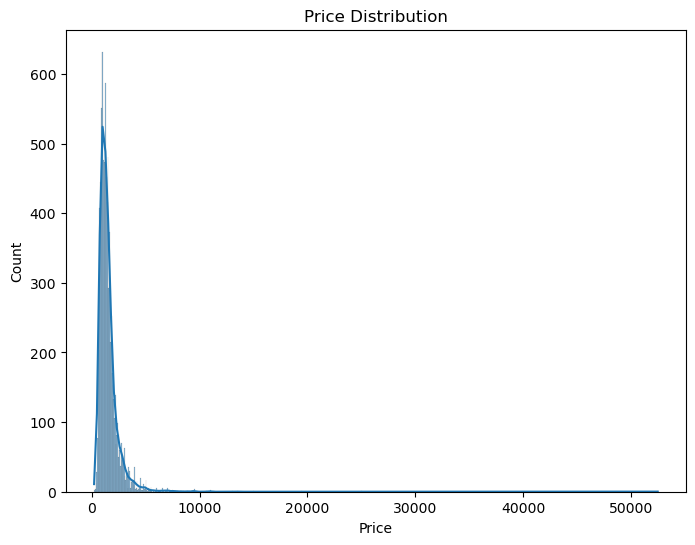

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [10]:
print((df['price'] > 5000).sum())

86


Analogamente ao preço do aluguel, há muitas apartamentos com um metro quadrado muito grande em relação aos demais.

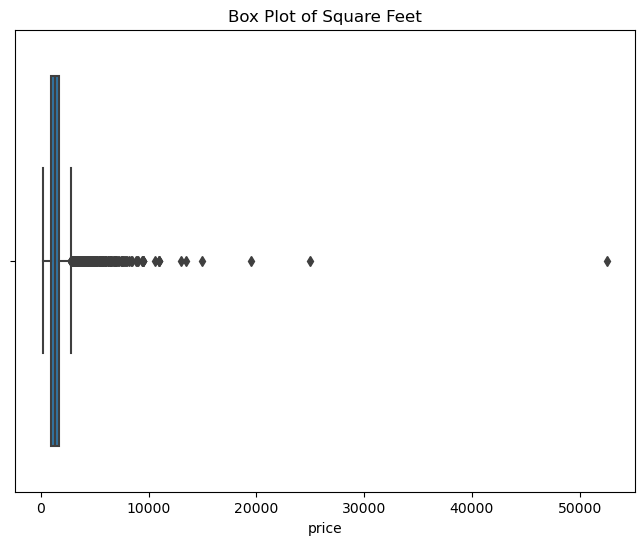

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Square Feet')
plt.show()

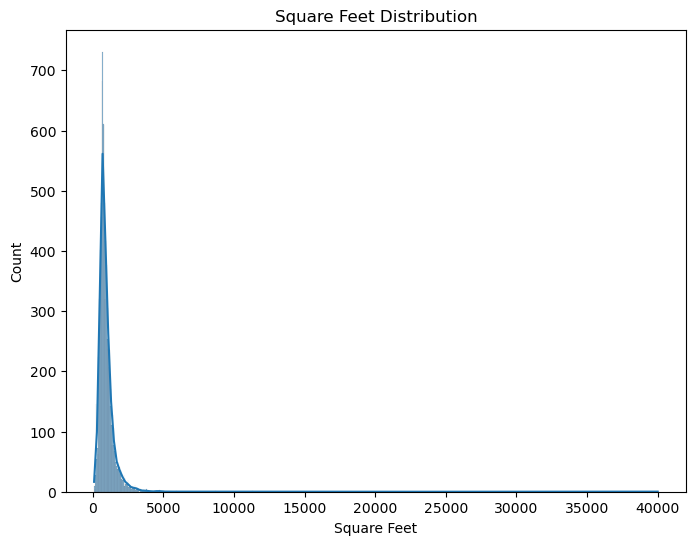

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['square_feet'], kde=True)
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.show()

In [13]:
print((df['square_feet'] > 2500).sum())

180


Quanto a quantidade de banheiros e de quartos, também há alguns outliers.

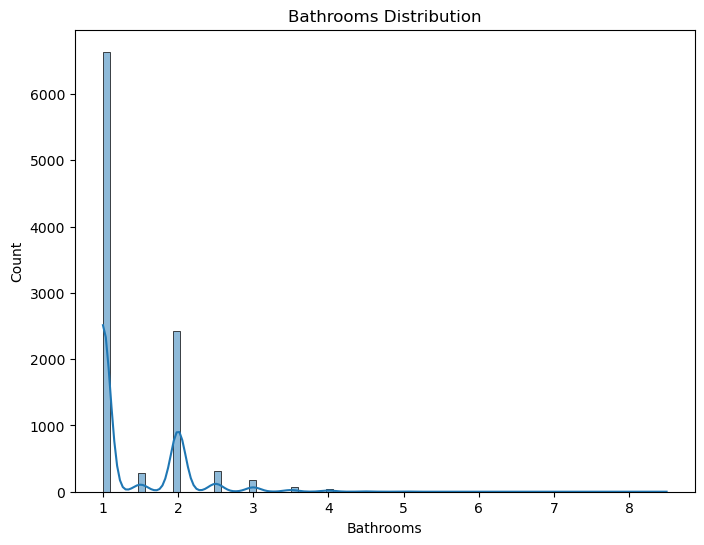

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bathrooms'], kde=True)
plt.title('Bathrooms Distribution')
plt.xlabel('Bathrooms')
plt.show()

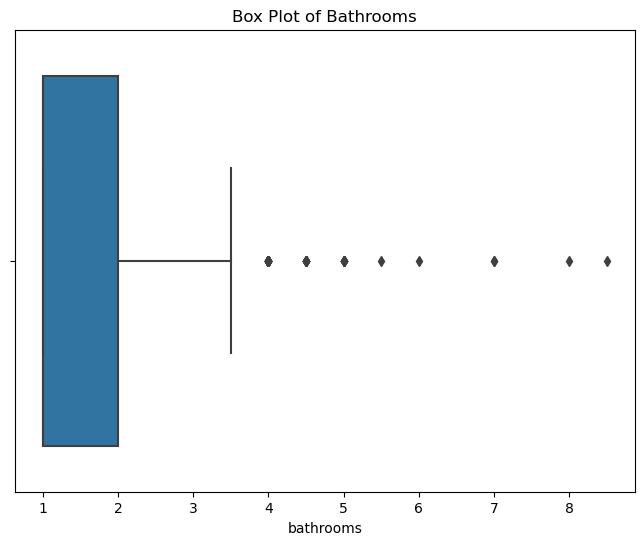

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathrooms', data=df)
plt.title('Box Plot of Bathrooms')
plt.show()

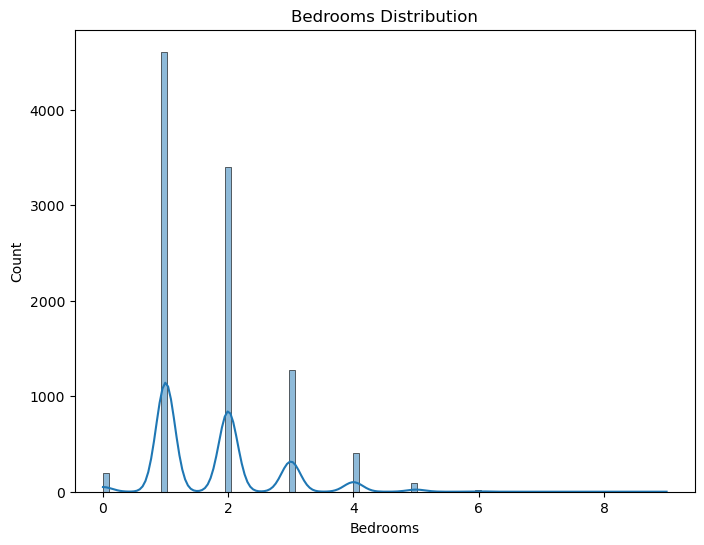

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.show()

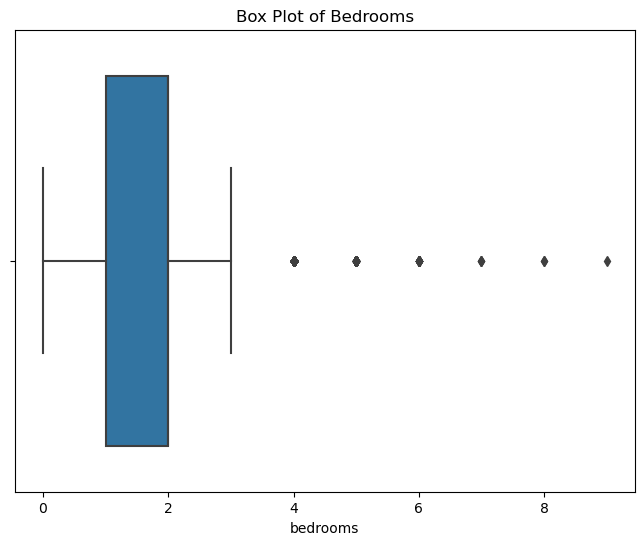

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', data=df)
plt.title('Box Plot of Bedrooms')
plt.show()

### Análise de atributos categóricos

In [18]:
unique_pets_allowed = df['pets_allowed'].unique()

# Print the unique values
print(unique_pets_allowed)

[nan 'Cats,Dogs' 'Cats' 'Dogs']


In [19]:
unique_amenities = df['amenities'].unique()

# Print the unique values
print(unique_amenities)
print(len(unique_amenities))

[nan 'Dishwasher,Elevator,Patio/Deck,Pool,Storage' 'Refrigerator' ...
 'Cable or Satellite,Dishwasher,Fireplace,Parking,Patio/Deck,Refrigerator,Wood Floors'
 'Elevator,Gym,Parking,Patio/Deck,Pool,Storage,Tennis,View'
 'Basketball,Cable or Satellite,Doorman,Hot Tub,Internet Access,Parking,Playground,Pool,Storage,Washer Dryer']
2255


In [20]:
combined_amenities = ', '.join(df['amenities'].dropna())

# Split the combined string by commas and create a list of words
word_list = [word.strip() for word in combined_amenities.split(',')]

# Get the unique words by converting the list to a set
unique_words = set(word_list)

# Print the unique words
print(unique_words)
print(len(unique_words))

{'View', 'AC', 'Garbage Disposal', 'Cable or Satellite', 'Alarm', 'Playground', 'Gated', 'Elevator', 'TV', 'Internet Access', 'Basketball', 'Washer Dryer', 'Fireplace', 'Clubhouse', 'Wood Floors', 'Luxury', 'Hot Tub', 'Pool', 'Storage', 'Golf', 'Doorman', 'Parking', 'Refrigerator', 'Dishwasher', 'Patio/Deck', 'Tennis', 'Gym'}
27


In [21]:
# Use the 'cityname' column and apply the value_counts() function to count city frequencies
state_counts = df['state'].value_counts()

# Get the city with the highest frequency
most_frequent_state = state_counts.index[0]

# Get the frequency of the most frequent city
frequency = state_counts.iloc[0]

# Print the most frequent city and its frequency
print(f"The state with the highest frequency is '{most_frequent_state}' with a frequency of {frequency}.")

The state with the highest frequency is 'TX' with a frequency of 1737.


In [22]:
# Use the 'cityname' column and apply the value_counts() function to count city frequencies
city_counts = df['cityname'].value_counts()

# Get the city with the highest frequency
most_frequent_city = city_counts.index[0]

# Get the frequency of the most frequent city
frequency = city_counts.iloc[0]

# Print the most frequent city and its frequency
print(f"The city with the highest frequency is '{most_frequent_city}' with a frequency of {frequency}.")

The city with the highest frequency is 'Austin' with a frequency of 523.


## **3. Data preparation (Preparação dos dados)**

### Análise de valores nulos

In [23]:
missing_values = df.isnull().sum()
print(missing_values)

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64


O grande número de valores "nulos" para as colunas amenities, pets_allowed pode se dever ao fato dessa base de dados indicar valores negativos como nulos. No caso dos pets_allowed, por exemplo, valores do tipo None podem indicar que pets não são permitidos.

### Definição de colunas escolhidas

Primeiramente, foram escolhidas as colunas necessárias para a clusterização. Foram escolhidas todas as colunas numéricas com exceção da latitude e longitude, já que a exclusão ou inclusão delas não melhorou os índices de avaliação. Além disso, a coluna "amenities" foi selecionada para que o número de instalações de cada apartamento sejam contados.

In [24]:
df_filtered = df[['square_feet', 'price', 'bathrooms', 'bedrooms', 'amenities', 'longitude', 'latitude']]
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,amenities,longitude,latitude
0,101,790,NaN,0.0,NaN,-76.9861,38.9057
1,106,425,NaN,1.0,NaN,-87.6621,37.9680
2,107,1390,1.0,0.0,NaN,-77.0816,38.8910
3,116,925,1.0,0.0,NaN,-122.3275,47.6160
4,125,880,NaN,0.0,NaN,-77.1055,38.8738


### Transformação do atributo amenities

Nesse processo de contagem de instalações, considerou-se que uma linha cuja coluna 'amenities' é nan corresponde a um apartamento com 0 instalações.


In [25]:
combined_amenities = ', '.join(df['amenities'].dropna())

# Split the combined string by commas and create a list of words
word_list = [word.strip() for word in combined_amenities.split(',')]

# Get the unique words by converting the list to a set
unique_words = set(word_list)

# Function to count the number of unique words in the 'amenities' column
def count_unique_words(amenities):
    if type(amenities) is float and pd.isna(amenities):
        return 0  # Set count to 0 when 'amenities' is NaN
    words_in_amenities = set(amenities.split(','))  # Assuming amenities are comma-separated
    count = len(unique_words.intersection(words_in_amenities))
    return count

# Apply the function to each row in the DataFrame and store the result in a new column
df_filtered['amenities_count'] = df_filtered['amenities'].apply(count_unique_words)

In [26]:
df_filtered.head()
df_filtered.drop(columns=['amenities'], inplace=True)

### Remoção de valores nulos e outliers

Para eliminação de outliers, usou-se o método do intervalo interquartil. Após a eliminação dessas amostras, é possível observar que os histogramas ficaram muito mais bem distribuídos.

In [27]:
# List of columns to check for null values
columns_to_check = ['price', 'longitude', 'latitude']


# Remove rows with null values in any of the specified columns
df_filtered = df_filtered.dropna(subset=columns_to_check)
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,longitude,latitude,amenities_count
0,101,790,NaN,0.0,-76.9861,38.9057,0
1,106,425,NaN,1.0,-87.6621,37.9680,0
2,107,1390,1.0,0.0,-77.0816,38.8910,0
3,116,925,1.0,0.0,-122.3275,47.6160,0
4,125,880,NaN,0.0,-77.1055,38.8738,0


In [28]:
columns_with_outliers = ['price', 'square_feet', 'bedrooms', 'bathrooms', 'amenities_count']

# Remove outliers using the IQR method for each column
for column in columns_with_outliers:
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers in the current column
    df_filtered = df_filtered.loc[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

### Gerando gráficos

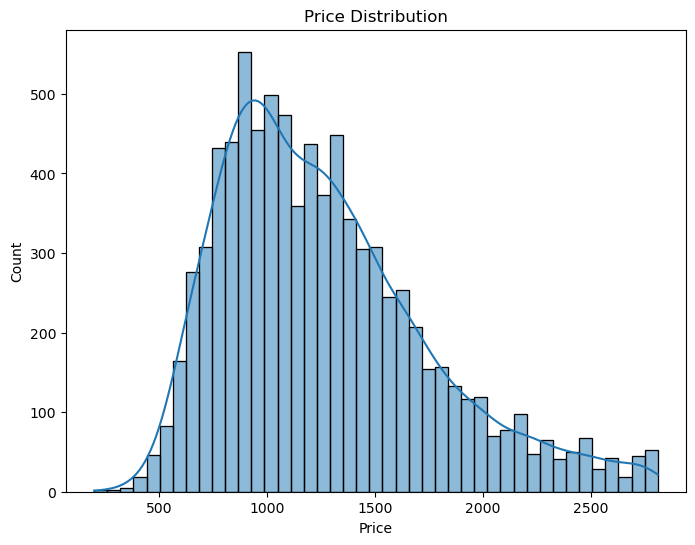

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

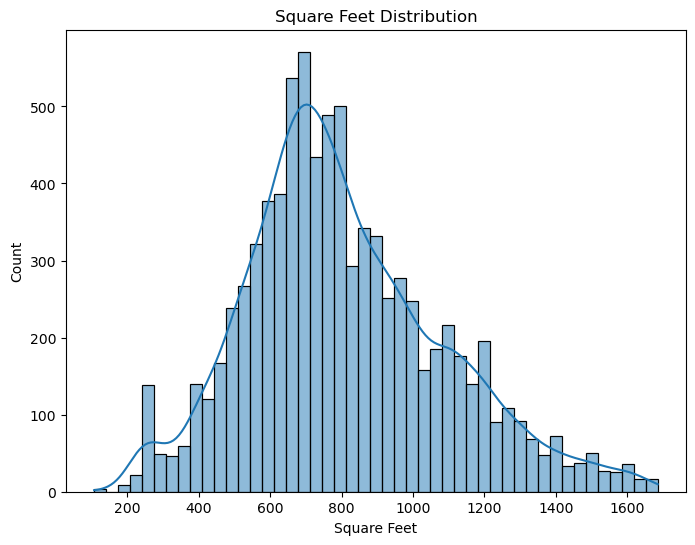

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['square_feet'], kde=True)
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.show()

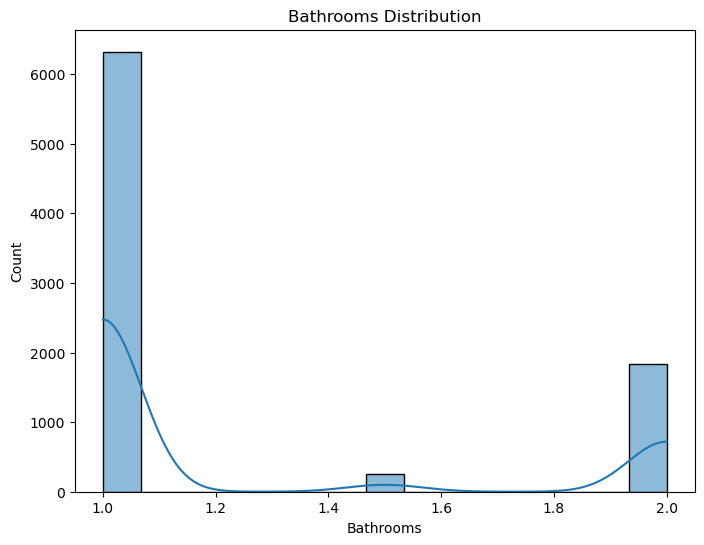

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['bathrooms'], kde=True)
plt.title('Bathrooms Distribution')
plt.xlabel('Bathrooms')
plt.show()

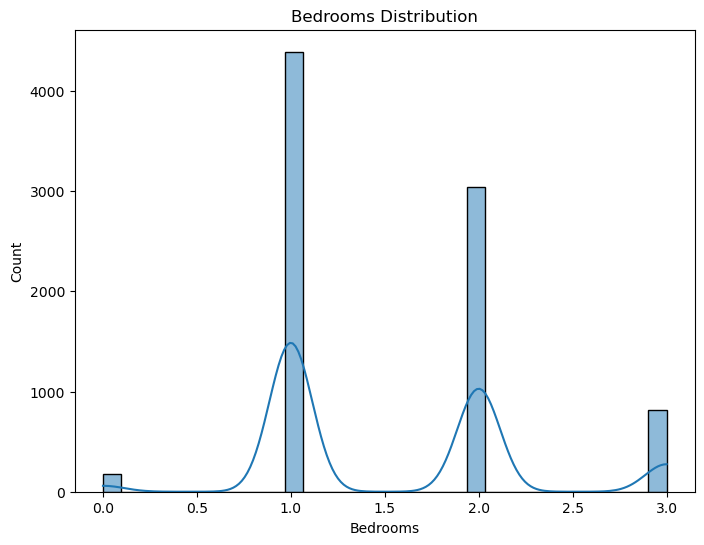

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.show()

### Checando se há valores nulos

In [33]:
missing_values = df_filtered.isnull().sum()
print(missing_values)

square_feet        0
price              0
bathrooms          0
bedrooms           0
longitude          0
latitude           0
amenities_count    0
dtype: int64


### Informações sobre o subconjunto do dataset escolhido

In [34]:
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,longitude,latitude,amenities_count
2,107,1390,1.0,0.0,-77.0816,38.8910,0
3,116,925,1.0,0.0,-122.3275,47.6160,0
5,130,2475,1.0,0.0,-73.9885,40.7629,5
8,138,1495,1.0,0.0,-122.4379,37.7599,1
14,190,1695,1.0,0.0,-122.4379,37.7599,1


In [35]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8414 entries, 2 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   square_feet      8414 non-null   int64  
 1   price            8414 non-null   int64  
 2   bathrooms        8414 non-null   float64
 3   bedrooms         8414 non-null   float64
 4   longitude        8414 non-null   float64
 5   latitude         8414 non-null   float64
 6   amenities_count  8414 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 525.9 KB


In [36]:
df_filtered.describe()

,square_feet,price,bathrooms,bedrooms,longitude,latitude,amenities_count
count,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000
mean,806.871999,1267.629903,1.233420,1.532921,-94.043526,37.744968,3.234252
std,276.991001,483.194634,0.414015,0.695230,15.208677,5.581235,3.279545
min,107.000000,200.000000,1.000000,0.000000,-158.022100,21.315500,0.000000
25%,624.000000,900.000000,1.000000,1.000000,-98.525300,33.517800,0.000000
50%,761.000000,1185.000000,1.000000,1.000000,-93.651600,38.911800,3.000000
75%,970.000000,1529.750000,1.000000,2.000000,-82.120500,41.545900,5.000000
max,1685.000000,2810.000000,2.000000,3.000000,-70.191600,61.594000,12.000000


Foram selecionadas as colunas que foram julgadas utéis para a clusterização e retirou-se os valores nulos que indicavam de fato valores faltantes. Nesse contexto, assumiu-se que os valores nulos nas colunas pets_allowed e amenities se referem a valores 'Falsos' e não nulos.

## **4. Modeling (Modelagem)**

### Funções auxiliares

In [37]:
#INICIO CODIGO MANUAL
def find_num_cluster(X,ini=2,fim=20,cluster_alg=1, score_type=0, scale_op=0):
    if scale_op==0:
        scaler=StandardScaler()
        X_scaled = scaler.fit_transform(X)
    elif scale_op==1:
        scaler=MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
    elif scale_op==2:
        scaler=RobustScaler()
        X_scaled = scaler.fit_transform(X)


    if score_type==0:
        silhouettes_arr={}
    elif score_type==1:
        davies_bouldin_arr={}
    elif score_type==2:
        chs_arr={}
    elif score_type==3:
        chs_arr={}
        silhouettes_arr={}
        davies_bouldin_arr={}

    for i in range(ini,fim):
        if cluster_alg==0:
            algorithm = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        elif cluster_alg==1:
            algorithm = AgglomerativeClustering(n_clusters=i)
        elif cluster_alg==2:
            algorithm = GaussianMixture(n_components=i, random_state=42)
        elif cluster_alg==3:
            algorithm = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=42)
        labels=algorithm.fit_predict(X_scaled)

        if score_type==0:
            silhouette_avg = round(silhouette_score(X, labels),3)
            silhouettes_arr[i]=silhouette_avg
        elif score_type==1:
            davies_bouldin = round(davies_bouldin_score(X, labels),3)
            davies_bouldin_arr[i]=davies_bouldin
        elif score_type==2:
            chs=round(calinski_harabasz_score(X, labels),3)
            chs_arr[i]=chs
        elif score_type==3:
            chs=round(calinski_harabasz_score(X, labels),3)
            chs_arr[i]=chs
            davies_bouldin = round(davies_bouldin_score(X, labels),3)
            davies_bouldin_arr[i]=davies_bouldin
            silhouette_avg = round(silhouette_score(X, labels),3)
            silhouettes_arr[i]=silhouette_avg

    if score_type==0:
        return silhouettes_arr
    elif score_type==1:
        return davies_bouldin_arr
    elif score_type==2:
        return chs_arr
    elif score_type==3:
        return [silhouettes_arr,davies_bouldin_arr,chs_arr]
#FIM CODIGO MANUAL

In [38]:
#INICIO CODIGO MANUAL
def scores_summary(X):
    scalers=[StandardScaler(), MinMaxScaler(), RobustScaler()]
    cluster_algs=["KMEANS","Hierarchical Clustering (Agglomerative Clustering)","Expectation-Maximization (Gausian Mixture)","Spectral Clustering"]
    for i in range(3):
        print("\n"+str(scalers[i])+":\n")
        for j in range(4):
            print("\t"+str(cluster_algs[j])+":\n")
            arr_info=find_num_cluster(X, cluster_alg=j,score_type=3, scale_op=i) 
            print("\t\tSilhouette score: ", arr_info[0], "\n") 
            print("\t\tDavies Bouldin score: ", arr_info[1], "\n") 
            print("\t\tCalinski Harabasz score: ", arr_info[2], "\n") 
#FIM CODIGO MANUAL

### Padronização dos dados

Primeiramente foi realizada a escolha das colunas que seriam utilizadas para a criação do cluster, selecionando atributos numéricos que acreditamos ser os mais relevantes na escolha e descrição de um apartamento

In [39]:
X = df_filtered[['square_feet', 'price', 'bathrooms', 'bedrooms', 'amenities_count']]

Para realizar a padronização dos dados escolhemos 3 diferentes escaladores, para podermos identificar qual traria efeitos melhores para a nossa clusterização:
    
    1. Standard Scaler: No qual todos os atributos tenham uma distribuição normal com média 0 e desvio padrão igual a 1
    2. Min-Max Scaler: No qual todos os atributos são distribuídos no intervalo entre 0 e 1, sendo consequentemente sensível a outliers
    3. Robust Scaler: O qual utiliza o primeiro e terceiro quartis dos atributos para gerar uma nova escala de dados' menos sensível a outliers

In [40]:
# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler=RobustScaler()
X_scaled = scaler.fit_transform(X)

### Análise do número de cluster ótimo

Utilizamos o método do cotovelo para gerar uma estimativa inicial do número de clusters ideal para o nosso processo, testando o seu desempenho com o kmeans

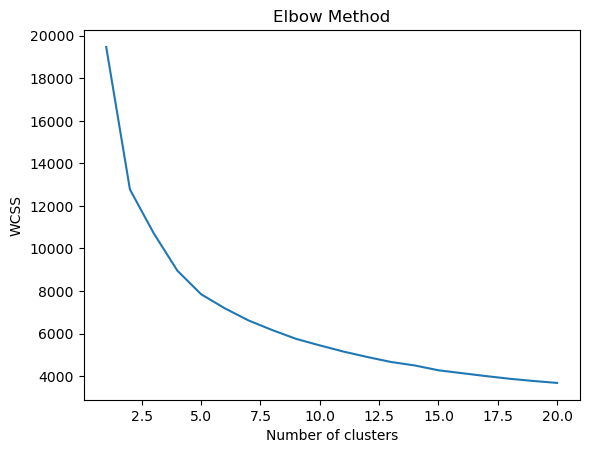

In [41]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


Optamos, também, por gerar os indices de silhueta, de Davies Bouldin e de Calinski Harabsz para clusterizações com o número de clusters(k) entre 2 e 20, permitindo realizar uma análise numérica desses indíces e assim escolher qual k irá proporcionar melhores clusters.
É importante ressaltar, que o resultado dessa análise numérica coincidiu com o observado no gráfico gerado pelo método do cotovelo, demonstrando a eficácia de ambos os métodos.

In [42]:
scores_summary(X)


StandardScaler():

	KMEANS:

		Silhouette score:  {2: 0.262, 3: 0.014, 4: 0.062, 5: 0.026, 6: 0.024, 7: 0.013, 8: -0.002, 9: -0.046, 10: 0.008, 11: -0.041, 12: -0.042, 13: -0.031, 14: -0.056, 15: -0.046, 16: -0.042, 17: -0.049, 18: -0.071, 19: -0.074} 

		Davies Bouldin score:  {2: 1.52, 3: 9.147, 4: 2.964, 5: 3.5, 6: 3.369, 7: 4.062, 8: 4.448, 9: 4.09, 10: 9.747, 11: 9.91, 12: 4.593, 13: 11.27, 14: 9.403, 15: 5.41, 16: 4.492, 17: 4.85, 18: 4.593, 19: 8.977} 

		Calinski Harabasz score:  {2: 2071.228, 3: 1033.465, 4: 2779.384, 5: 2011.463, 6: 2099.197, 7: 2088.552, 8: 1730.875, 9: 1861.219, 10: 1648.888, 11: 1583.776, 12: 1701.291, 13: 1549.031, 14: 1360.788, 15: 1540.478, 16: 1536.584, 17: 1482.696, 18: 1448.17, 19: 1378.903} 

	Hierarchical Clustering (Agglomerative Clustering):

		Silhouette score:  {2: 0.235, 3: 0.023, 4: -0.074, 5: -0.011, 6: -0.016, 7: -0.044, 8: -0.046, 9: -0.04, 10: -0.032, 11: -0.044, 12: -0.054, 13: -0.073, 14: -0.079, 15: -0.077, 16: -0.069, 17: -0.07, 18: 

### Escolha de parâmetros para o DBSCAN

A abordagem de escolha de número de clusters foi eficaz para o outros modelos de clusterização escolhidos, mas para o modelo DBSCAN os parâmetros a serem variados são o episilon e o número mínimo de amostras. Para isso variamos ambos esses valores em um intervalo recomendado pela ferramenta do ChatGPT, e identificando qual combinação deles gerou um indice de silhueta melhor.

In [43]:
scalers=[StandardScaler(),MinMaxScaler(), RobustScaler()]
for scaler in scalers:
    print(str(scaler))
    DB_scaled=scaler.fit_transform(X)
    best_eps, best_min_samples, best_silhouette_score = None, None, -1

    for eps in np.arange(0.1, 1.0, 0.1):
        for min_samples in range(5, 21, 5):
            #INICIO CODIGO ALTERADO
            try:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(DB_scaled)
                silhouette_avg = silhouette_score(DB_scaled, labels)
                if silhouette_avg > best_silhouette_score:
                    best_eps, best_min_samples, best_silhouette_score = eps, min_samples, silhouette_avg
            except Exception as e:
                print(f"Error occurred for eps={eps}, min_samples={min_samples}: {e}")
                break  # Exit the inner loop when an exception occurs
        else:
            continue  # Continue to the next iteration of the outer loop if no exception occurred
        break  # Exit the outer loop when an exception occurs in the inner loop
        #FIM CODIGO ALTERADO
    print("Best eps:", round(best_eps,1))
    print("Best min_samples:", best_min_samples)
    print("Best Silhouette Score:", best_silhouette_score)


StandardScaler()
Best eps: 0.9
Best min_samples: 20
Best Silhouette Score: 0.16657618850113473
MinMaxScaler()
Error occurred for eps=0.6, min_samples=5: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Best eps: 0.5
Best min_samples: 5
Best Silhouette Score: 0.5519446629912557
RobustScaler()
Best eps: 0.8
Best min_samples: 5
Best Silhouette Score: 0.18180634587979339


Após realizarmos as escolhas dos hiperparâmetros para cada um de nossos modelos de clusterização, precisamos aplicá-los e identificar o desempenho de cada um deldes

### KMEANS

O algoritmo K-means é um algoritmo de clusterização que agrupa os dados em k grupos distintos. Cada um desses clusters é representado por um centróide, que é a média dos pontos do cluster. E o objetivo desse algoritmo é minimizar a variância intra-cluster

In [44]:
k = 3 # Your chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels=kmeans.fit_predict(X_scaled)

### Hierarchical Clustering (Agglomerative Clustering):

O Hierarchical CLustering é um algoritmo de clusterização que constrói uma hierarquia de clusters. A versão aglomerativa começa com pontos individuais e realiza uniões com clusters próximos até gerar o número de clusters desejado

In [45]:
num_clusters = 3

# Apply hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg_clustering.fit_predict(X_scaled)

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

O DBSCAN é um algoritmo de clusterização que agrupa os pontos com base na densidade local. As vantagens desse método são a capacidade de identificar clusters de forma flexível, podendo encontrar clusters de tamanhos e formas diferentes, sem a necessidade da definição de um número inicial de clusters, e identificando outliers

In [46]:
eps_value = 0.8  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The minimum number of samples in a neighborhood for a point to be a core point
db_clustering = DBSCAN(eps=eps_value, min_samples=min_samples)
db_labels = db_clustering.fit_predict(X_scaled)

In [47]:
# Check the cluster sizes, consider -1 as noise points in DBSCAN
cluster_sizes=np.bincount(db_labels+1)
print("Cluster Sizes (Including Noise Points):")
print(cluster_sizes)

Cluster Sizes (Including Noise Points):
[  17  172 4384 3033  808]


###  Expectation-Maximization (Gausian Mixture):

O EM é um algoritmo de aprendizado não supervisionado com a ideia principal de iterativamente estimar os parâmetros de um modelo, até alcançar a convergência. Esse algoritmo é muito útil quando os dados são distribuídos de acordo com várias distribuições e queremos encontrar essas distribuições adjacentes

In [48]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

### Spectral Clustering:

Spectral clustering é um algoritmo de clusterização que utiliza propriedades relacionadas aos autovalores e autovetores de uma matriz de afinidade dos dados para encontrar clusters. Sendo especialmente útil quando os dados não podem ser separados por fronteiras de decisão lineares. Essa é uma técnica poderosa para detectar clusters em dados com alta dimensionalidade ou quando os clusters estão embaralhados em espaços de baixa dimensão.

In [49]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels=spectral.fit_predict(X_scaled)

# **Resultados Experimentais e Análise**

## **5. Evaluation (Validação)**


### Funções auxiliares

In [50]:
#INICIO CODIGO MANUAL
def clustering_info(X, labels):
        silhouette_avg = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        chs = calinski_harabasz_score(X, labels)
        print(f"Silhouette Score: {silhouette_avg}")
        print(f"Davies-Bouldin Index: {davies_bouldin}")
        print(f"Calinski and Harabasz Score: {chs}")
#FIM CODIGO MANUAL

In [51]:
def plot_PCA(df_filtered, labels):

    # Assuming 'data' is your dataset and 'labels' contains cluster assignments
    # Reduce the dimensionality using PCA to 2 components
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(df_filtered)

    # Get the explained variance ratio for the first 2 components
    explained_var_ratio = pca.explained_variance_ratio_

    # Create a scatter plot for each cluster
    for cluster_label in set(labels):
        # Select data points belonging to the current cluster
        cluster_data = data_pca[labels == cluster_label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.5, s = 10)

    # Add labels and a legend
    plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}%)')
    plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}%)')
    plt.legend()
    plt.title('Cluster Visualization using PCA')
    plt.show()

In [52]:
def plot_attributes(df_filtered, labels, att1='price', att2='square_feet'):
    # Select the features for x and y axes
    x = df_filtered[att1]
    y = df_filtered[att2]

    # Create a scatter plot for each cluster
    for cluster_label in set(labels):
        cluster_x = x[labels == cluster_label]
        cluster_y = y[labels == cluster_label]
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {cluster_label}')

    # Add labels and a legend
    plt.xlabel(att1)
    plt.ylabel(att2)
    plt.legend()
    plt.title('Cluster Visualization based on '+ att1 +' and '+att2)
    plt.show()


In [53]:
def plot_boxplots_by_cluster(dataframe, cluster_labels, value_column):
    # Create a new DataFrame by combining the cluster labels and the value column
    data = pd.DataFrame({value_column: dataframe[value_column].values, 'Cluster': cluster_labels})
    
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.boxplot(x='Cluster', y=value_column, data=data)
    plt.title(f'Boxplots for {value_column} by cluster')
    plt.xlabel('Cluster')
    plt.ylabel(value_column)
    plt.show()

In [54]:
def generate_cluster_summary(dataframe, cluster_labels):
    """
    Generate summary statistics (mean and median) for every column within each cluster.

    Args:
    dataframe (pd.DataFrame): Input DataFrame containing attributes.
    cluster_labels (array-like): Array containing cluster labels for each row in the DataFrame.

    Returns:
    pd.DataFrame: Summary statistics DataFrame containing mean and median values for every column within each cluster.
    """
    # Add cluster labels to the original DataFrame
    dataframe['Cluster'] = cluster_labels
    
    # Group by 'Cluster' and calculate mean and median for each column
    summary_stats = dataframe.groupby('Cluster').agg(['mean', 'median', 'min', 'max'])
    
    return summary_stats


### Clusters Info

Foi possível perceber que em todos os indíces utilizados para a análise a configuração encontrada para o K-means apresentou melhor desempenho que os outros algoritmos de clusterização. Dessa forma, o resto da análise dos resultados será realizada com base nos clusters criados por esse algoritmo, utilizando o Robust Scaler, com k=3.

Pelas métricas geradas e comparando todos os métodos de clusterização, observa-se que usar o algoritmo Kmeans com 3 clusteres é o mais adequado nessa situação. Isso se justifica pelo valor de silhueta razoável - acima de 0, um índice de Davies-Bouldin baixo em relação a outros algoritmos e números de clusteres e um valor de índice de Calinski e Harabasz relativamente alto.

In [55]:
print("KMEANS:\n")
clustering_info(X, kmeans_labels)
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
clustering_info(X, agg_labels)
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
clustering_info(X, db_labels)
print("\nExpectation-Maximization (Gausian Mixture):\n")
clustering_info(X, gmm_labels)
print("\nSpectral Clustering:\n")
clustering_info(X, spectral_labels)

KMEANS:



Silhouette Score: 0.3452970800341692
Davies-Bouldin Index: 1.2202557496001751
Calinski and Harabasz Score: 4927.827190611152

Hierarchical Clustering (Agglomerative Clustering):

Silhouette Score: 0.24871598514997936
Davies-Bouldin Index: 1.515166174225433
Calinski and Harabasz Score: 2969.3415401796838

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Silhouette Score: 0.03133243566310165
Davies-Bouldin Index: 5.677035554828345
Calinski and Harabasz Score: 308.49781766489883

Expectation-Maximization (Gausian Mixture):

Silhouette Score: 0.16761181715305146
Davies-Bouldin Index: 3.4477640673016965
Calinski and Harabasz Score: 899.6431135021635

Spectral Clustering:

Silhouette Score: 0.0770362042326838
Davies-Bouldin Index: 3.4566051123832566
Calinski and Harabasz Score: 587.1445628597575


Pelas informações mostradas nos plots e nas tabelas a seguir, pode-se retirar algumas informações sobre os clusteres. Por exemplo, quanto ao área do apartamento, o cluster 0 e 2 tem uma área parecida, enquanto a 1 tem uma área um pouco maior. Quanto ao preço, o cluster 0 tem, em geral, tem preços menores, seguido pelo 1 e, finalmente, o mais caro, cluster 2. A a diferença quanto a quantidade de banheiros, quartos e comodidades não é tão conclusiva, mas ainda sim é possível traçar algumas observações.

Por exemplo, o cluster 1 tem mais banheiros e quartos, na média. Já a quantidade de comodidades parece ser relativamente parecida para todos os clusteres.

### Médias e Medianas dos clusters

In [56]:
print("KMEANS:\n")
generate_cluster_summary(X, kmeans_labels)

KMEANS:



square_feet                           price                      \
                mean  median  min   max         mean  median   min   max   
Cluster                                                                    
0         649.886093   664.0  107  1200   958.350869   950.0   200  1591   
1        1145.499791  1118.0  504  1685  1444.686430  1375.0   390  2810   
2         731.176078   740.0  130  1330  1831.149970  1724.0  1275  2800   

        bathrooms                   bedrooms                  amenities_count  \
             mean median  min  max      mean median  min  max            mean   
Cluster                                                                         
0        1.009378    1.0  1.0  2.0  1.229643    1.0  0.0  3.0        3.556725   
1        1.774530    2.0  1.0  2.0  2.282672    2.0  0.0  3.0        3.150731   
2        1.041287    1.0  1.0  2.0  1.247723    1.0  0.0  3.0        2.499696   

                        
        median min max  
Cluster                 
0          3.0   0  12  
1          3.0   0  12  
2          1.0   0  12

### Gráficos PCA

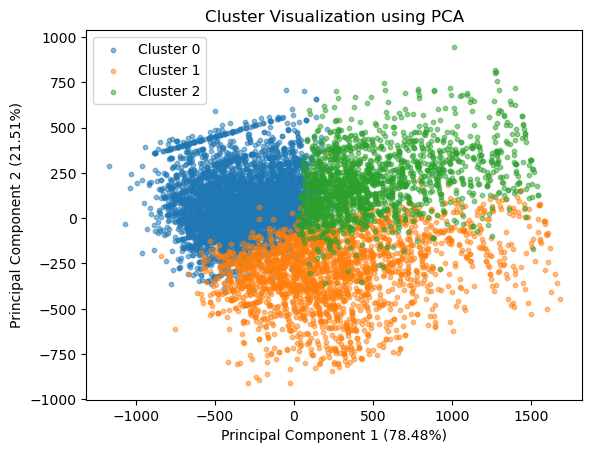

In [57]:
plot_PCA(X, kmeans_labels)

### Gráficos preço por metro quadrado

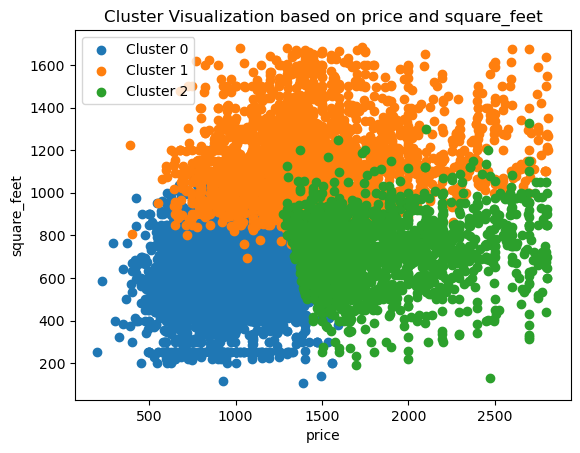

In [58]:
plot_attributes(df_filtered, kmeans_labels, 'price', 'square_feet')

### Gráficos preço por número de amenities

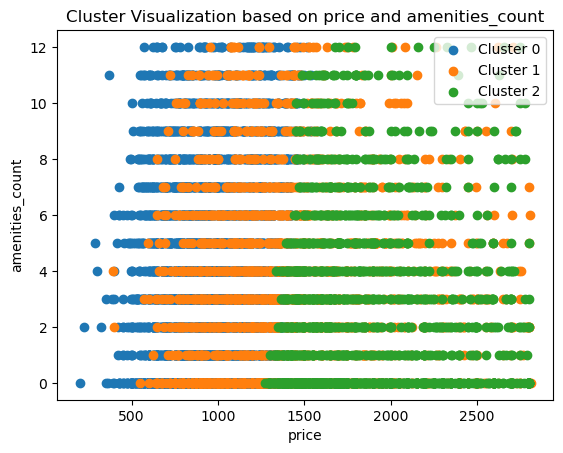

In [59]:
plot_attributes(df_filtered, kmeans_labels, 'price', 'amenities_count')

### Clusters Boxplots

#### Preço

KMEANS:



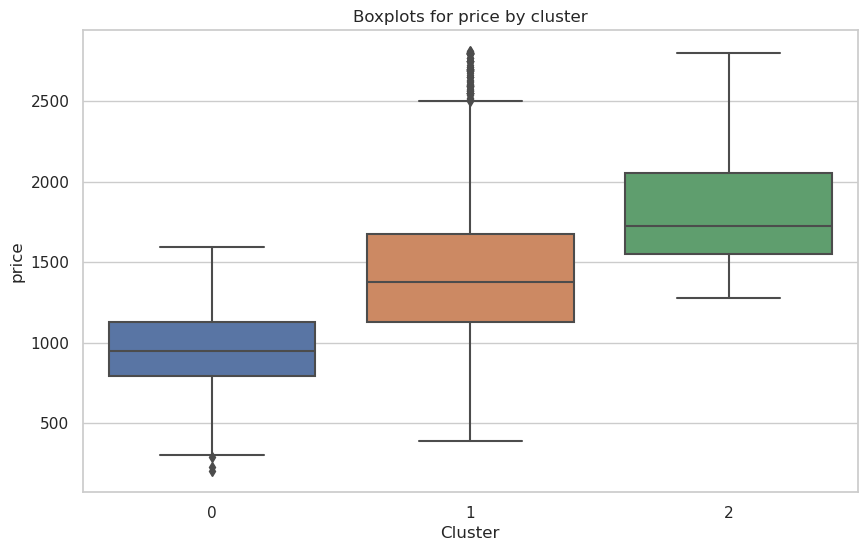

In [60]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'price')

#### Metros Quadrados

KMEANS:



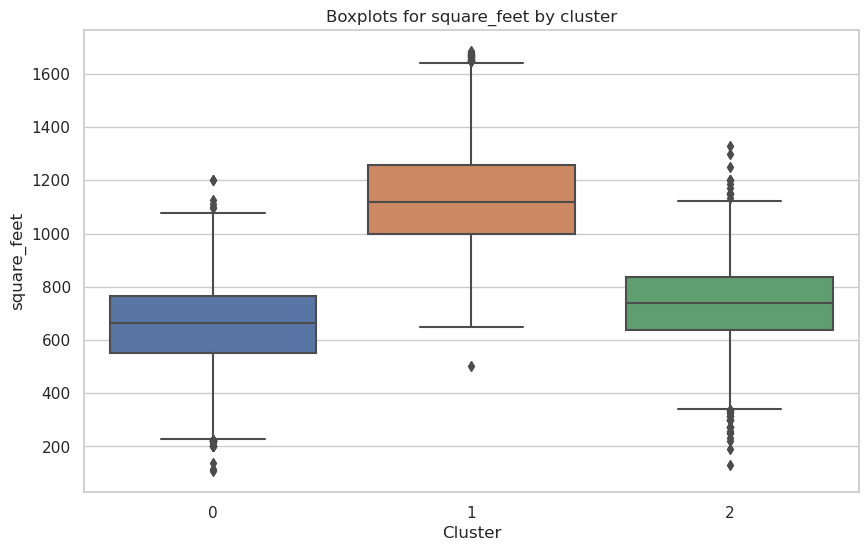

In [61]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'square_feet')

#### Número de Amenities

KMEANS:



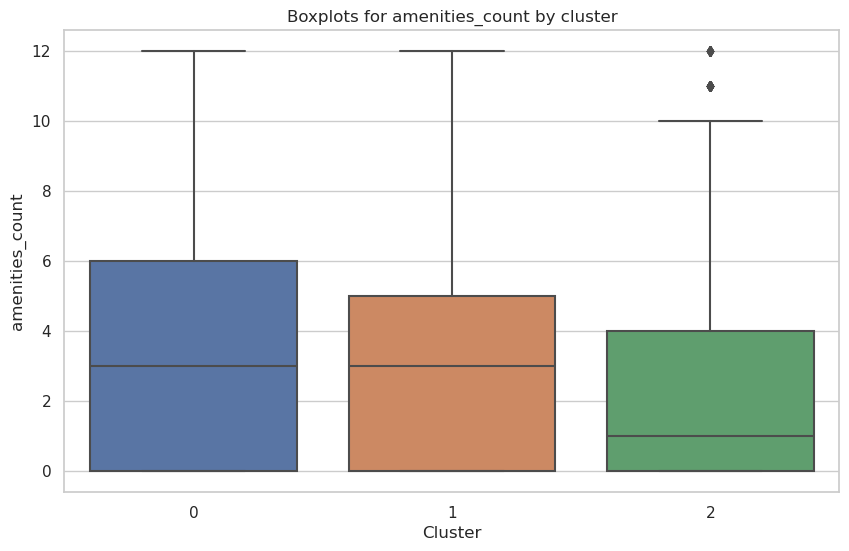

In [62]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'amenities_count')

#### Quartos

KMEANS:



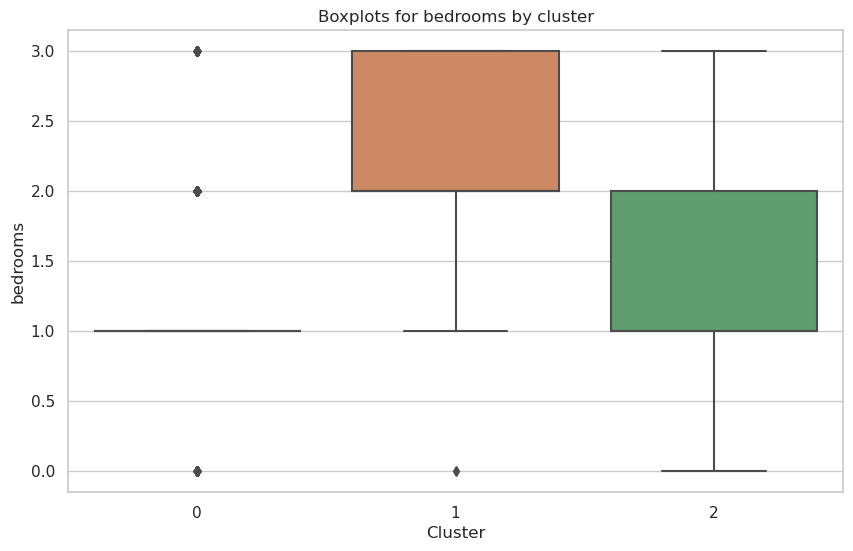

In [63]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'bedrooms')

#### Banheiros

KMEANS:



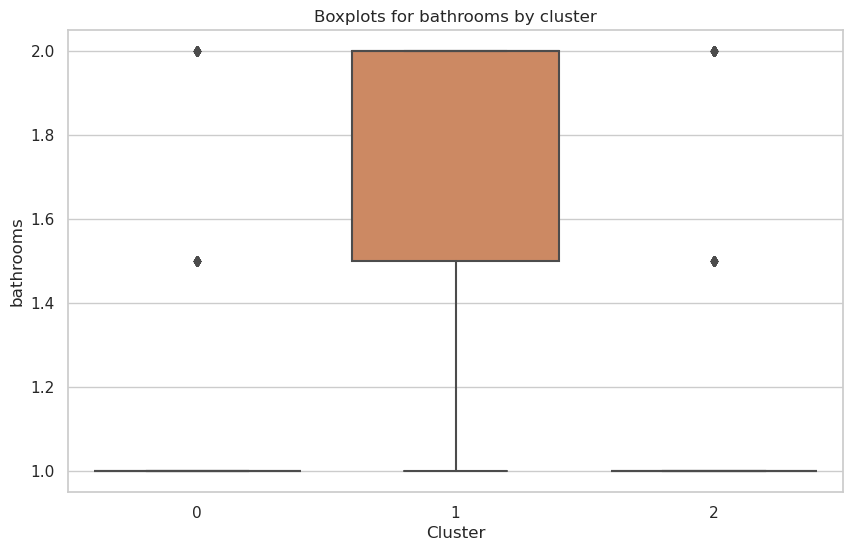

In [64]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'bathrooms')

### Clusters Map

Esse mapa gerado representa a distribuição dos clusteres no mapa dos Estados Unidos. Após uma análise, é possível perceber alguns padrões: há uma concentração maior de apartamentos do cluster 0 (verde) nas costas e uma concentração de maior de apartamentos do cluster 1 (laranja) no lado leste.

In [65]:
center_latitude = df_filtered['latitude'].mean()
center_longitude = df_filtered['longitude'].mean()
df_filtered['cluster'] = kmeans_labels
gmap = gmplot.GoogleMapPlotter(center_latitude, center_longitude, zoom=10)

# Define a list of colors for 5 clusters
cluster_colors = ['blue', 'orange', 'green']

# Iterate through your data points (latitude, longitude, cluster) in your DataFrame
for index, row in df_filtered.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    cluster_label = row['cluster']

    # Add a marker for each data point with a specific color based on the cluster
    marker_color = cluster_colors[int(cluster_label) % len(cluster_colors)]
    gmap.marker(latitude, longitude, title=f'Cluster {cluster_label}', color=marker_color)

# Create an HTML file to display the map
gmap.draw('cluster_map.html')

# Display the map in the notebook using an iframe
from IPython.display import IFrame
IFrame('cluster_map.html', width=800, height=600)

# **Conclusão e Perspectivas**

A partir da análise dos dados disponibilizados em nosso dataset e dos cluster gerados a partir deles, foi possível perceber certas distinções entre os conjuntos de apartamentos disponíveis, que podem ser refletidas em diferentes esferas do mercado de imóveis.

Desse modo, é notável que a clusterização é uma ferramenta muito útil para a segmentação desses apartamentos, permitindo uma análise mais profunda e acessível de cada um dos clusters. 

Como consequência desse processo e das características inerentes a ele, é perceptível que clusters podem ser utilizados para facilitar a vida de proprietários de apartamento e de pessoas em busca de um, facilitando tanto o processo de venda quanto de compra, ao agrupar imóveis semelhantes com base em diversas características.